<a href="https://colab.research.google.com/github/SKslwana/Automotive-Engine-Health-Predictive-Maintenance-Project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHECKING VERSIONS OF LIBRARIES

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
scipy: 1.11.4
numpy: 1.23.5
matplotlib: 3.7.1
pandas: 1.5.3
sklearn: 1.2.2


# IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#from pydantic.v1 import BaseSettings
#from pandas_profiling.profile import ProfileReport
import pathlib

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve, accuracy_score, mean_squared_error

# EXPLARATORY DATA ANALYSIS

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#df = pd.read_csv('engine_data.csv')
engine_df = pd.read_csv('/content/drive/MyDrive/engine_data.csv')
#previewdataset
engine_df.head(10)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,1
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0


In [5]:
# Check size and shape of datasets
engine_df.shape

(19535, 7)

In [6]:
# count missing values per feature
missing_values = engine_df.isnull().sum()
print('Missing values per feature:')
print(missing_values)

Missing values per feature:
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


In [7]:
#identify duplicated values
duplicates=engine_df.duplicated()
print(engine_df[duplicates])

Empty DataFrame
Columns: [Engine rpm, Lub oil pressure, Fuel pressure, Coolant pressure, lub oil temp, Coolant temp, Engine Condition]
Index: []


In [8]:
# check data types of each feature
print('Data types of each feature:')
print(engine_df.dtypes)

Data types of each feature:
Engine rpm            int64
Lub oil pressure    float64
Fuel pressure       float64
Coolant pressure    float64
lub oil temp        float64
Coolant temp        float64
Engine Condition      int64
dtype: object


In [9]:
# engine_data_pr = ProfileReport(engine_df, config_file=None)
# engine_data_pr.to_file('engine_data_pr.html')
# print(engine_data_pr)

In [10]:
engine_df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [11]:
# check for any inconsistent values in categorical features
categorical_features = engine_df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    unique_values = engine_df[feature].unique()
    if len(unique_values) > 1:
        print(f'Inconsistent values found in {feature}:')
        print(unique_values)

In [12]:
# Count the number of 0s and 1s
count = engine_df['Engine Condition'].value_counts()
print(count)


1    12317
0     7218
Name: Engine Condition, dtype: int64


**Important**


There is binary encoding to the target variable:
    

*   0: Bad Condition
*   1: Good Condition


    



# DATA VISUALIZATION

**Calculating the Correlation Coefficient**

In [13]:
corr_matrix = engine_df.corr()
corr_matrix["Engine Condition"].sort_values(ascending=False)

Engine Condition    1.000000
Fuel pressure       0.116259
Lub oil pressure    0.060904
Coolant pressure   -0.024054
Coolant temp       -0.046326
lub oil temp       -0.093635
Engine rpm         -0.268201
Name: Engine Condition, dtype: float64

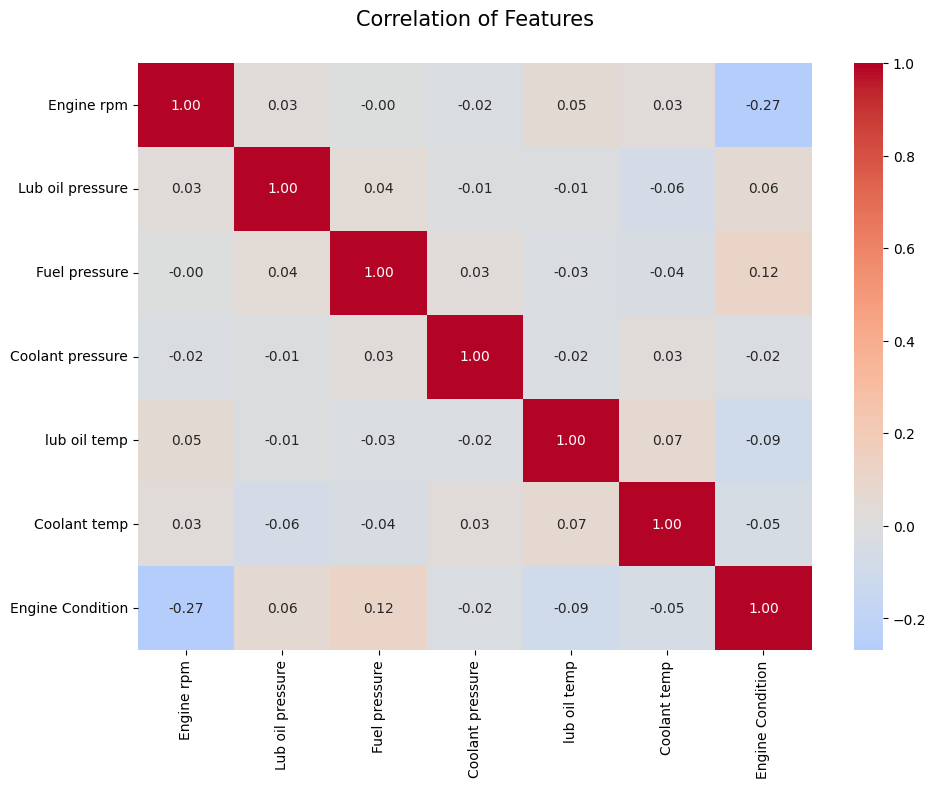

In [14]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
plt.title('Correlation of Features', y=1.05, size=15)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Adjust the plot
plt.tight_layout()

# Show the plot
plt.show()

*   Engine Condition has the highest positive correlation with Fuel Pressure
*   Engine Condition has the highest negative correlation with Engine RPM

Based on the correlation matrix, it looks like there is a highest negative correlation between the engine RPM and the engine condition, with a coefficient of -0.27. This suggests that as the engine RPM increases, the likelihood of a negative engine condition (presumably '1' which might indicate a fault) increases slightly, or conversely, lower RPMs are more associated with a positive engine condition (presumably '0' which might indicate a normal condition). It's not a very strong correlation, but it is the most notable among the features.

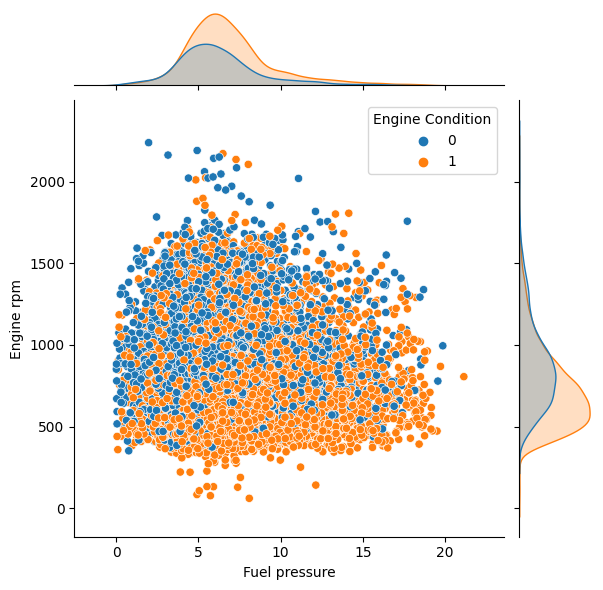

In [15]:
sns.jointplot(engine_df, x="Fuel pressure", y="Engine rpm", hue="Engine Condition")



* We can verify that for higher/consistent values of Fuel Pressure and low values of Engine rpm the Engine Condition is positive




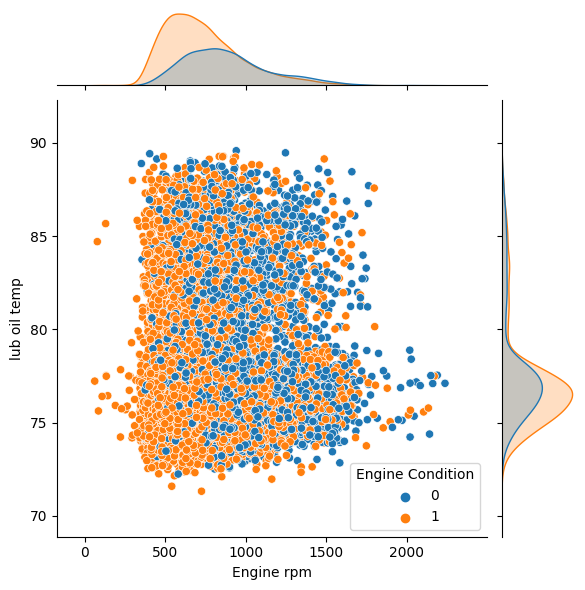

In [16]:
sns.jointplot(engine_df, x="Engine rpm", y="lub oil temp", hue="Engine Condition")



*  Most of the the O range datapoints indicating a Negative Engine Condition are on the left side




# FEATURE IMPORTANCE

In [17]:
# convert the DataFrame to a numpy array
data = engine_df.to_numpy()

In [18]:
# Separate target variable and features
engine_df = pd.DataFrame(data, columns=['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp','Engine Condition'])
X = engine_df.drop('Engine Condition', axis=1)
y = engine_df['Engine Condition']

# Fit the Gradient Boosting Classifier on the data
model = GradientBoostingClassifier()
model.fit(X, y)

# Get the feature importances and sort in descending order
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)

# Print the sorted feature importances
print(feature_importances)

            feature  importance
0        Engine rpm    0.585996
2     Fuel pressure    0.160802
4      lub oil temp    0.101928
1  Lub oil pressure    0.076158
3  Coolant pressure    0.042832
5      Coolant temp    0.032284


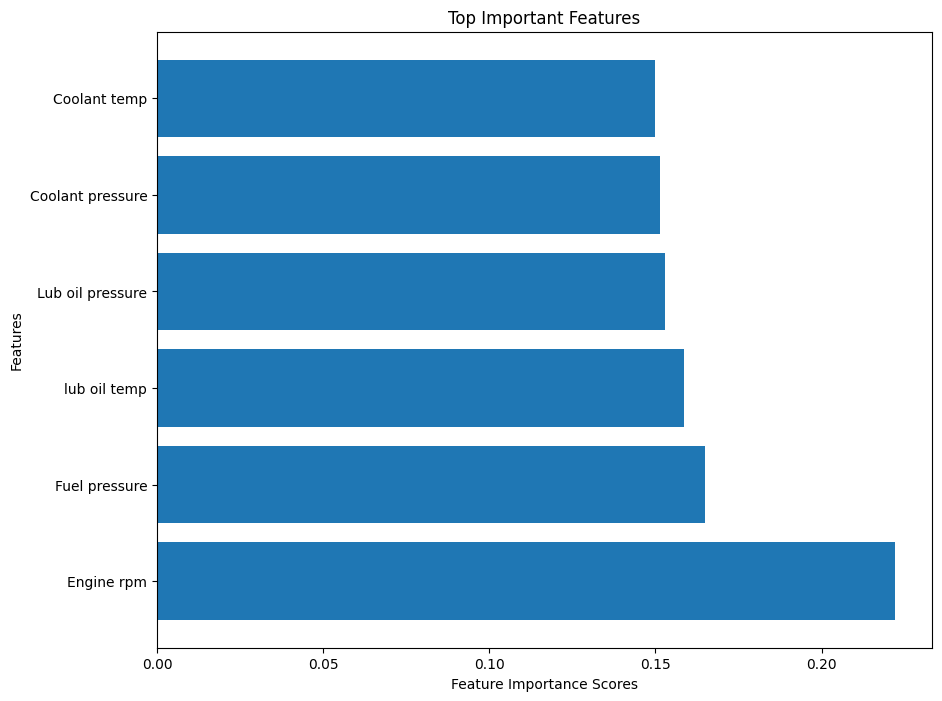

In [19]:
# Convert numpy array to pandas DataFrame
engine_df = pd.DataFrame(data, columns=['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp','Engine Condition'])

# Separate the features and target variable
X = engine_df.iloc[:, :-1]
y = engine_df.iloc[:, -1]

# Create an instance of the ExtraTreesClassifier algorithm
model = ExtraTreesClassifier()

# Fit the model on the data
model.fit(X, y)

# Get the feature importance scores
importances = model.feature_importances_

# Sort the feature importance scores in descending order
sorted_importances = sorted(zip(importances, X.columns), reverse=True)

# Select the top 7 features
best_features = [feature[1] for feature in sorted_importances[:7]]

# Plot the feature importance scores of the top 7 features
plt.figure(figsize=(10, 8))
plt.barh(range(len(best_features)), [importances[X.columns.get_loc(feature)] for feature in best_features], align='center')
plt.yticks(range(len(best_features)), best_features)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('Top Important Features')
plt.show()

In [20]:
engine_df = pd.read_csv('/content/drive/MyDrive/engine_data.csv')
engine_df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


# TRYING NEW ATTRIBUTES (Feature Engineering)

Seperating the Features and Targets

In [21]:
engine_features = engine_df.drop("Engine Condition", axis=1)
engine_labels = engine_df["Engine Condition"]

In [22]:
# Oiling system
# engine_df["Oil System"] = engine_df["Lub oil pressure"] * engine_df["lub oil temp"]

# Coolant System
# engine_df["Coolant System"] = engine_df["Coolant pressure"] * engine_df["Coolant temp"]

# Coolant Efficiency
engine_df["Coolant Efficiency"] = (1 / engine_df["Engine rpm"]) * engine_df["Coolant temp"]

# Oil Efficiency
engine_df["Oil Efficiency"] = 1 / (engine_df["Engine rpm"] * engine_df["lub oil temp"])

engine_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition,Coolant Efficiency,Oil Efficiency
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1,0.116617,0.000017
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0,0.094116,0.000015
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1,0.153165,0.000025
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1,0.151743,0.000029
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0,0.140550,0.000021


Calculating the Correlations with the New Attributes

In [23]:
corr_matrix = engine_df.corr()
corr_matrix["Engine Condition"].sort_values(ascending=False)

Engine Condition      1.000000
Oil Efficiency        0.274301
Coolant Efficiency    0.252389
Fuel pressure         0.116259
Lub oil pressure      0.060904
Coolant pressure     -0.024054
Coolant temp         -0.046326
lub oil temp         -0.093635
Engine rpm           -0.268201
Name: Engine Condition, dtype: float64

* Oil Efficiency and Coolant Efficiency have high positive correlation to a Positive Engine Condition.





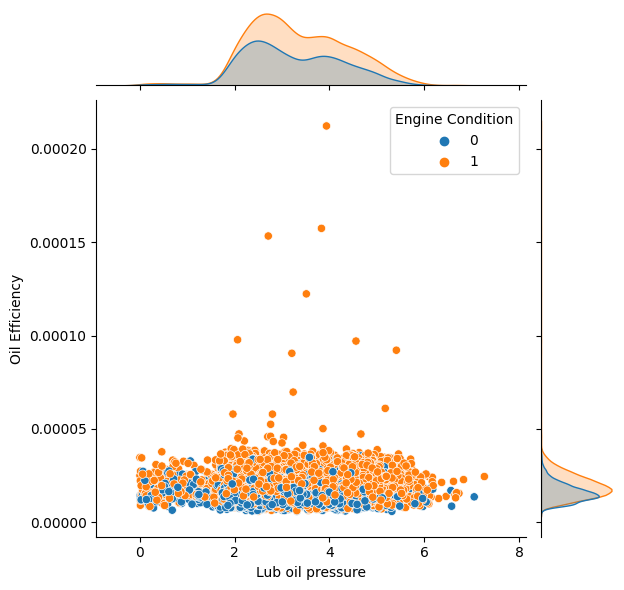

In [24]:
sns.jointplot(engine_df, x="Lub oil pressure", y="Oil Efficiency", hue="Engine Condition")

*   As the Oil Efficiency increases the Engine Condition is mostly positive.
*   The Lub Oil Pressure has a mostly uniform distribution over the entire range of values.







Building a Custom Transformer to add the new attibutes

In [25]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline

rpm_idx, oil_pressure_idx, coolant_pressure_idx, oil_temp_idx, coolant_temp_idx = 0, 1, 3, 4, 5

class AttributesAdder(BaseEstimator, TransformerMixin):

    # Constructor of the Class
    def __init__(self, add_oil_system=True, add_coolant_system=True):
        self.add_oil_system = add_oil_system
        self.add_coolant_system = add_coolant_system

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.add_oil_system:
            # oil_system = X[:, oil_pressure_idx] * X[:, oil_temp_idx]
            oil_efficiency = 1 / (X[:, rpm_idx] * X[:, oil_temp_idx])
            # X = np.c_[X, oil_system, oil_efficiency]
            X = np.c_[X, oil_efficiency]

        if self.add_coolant_system:
            # cool_system = X[:, coolant_pressure_idx] * X[:, coolant_temp_idx]
            cool_efficiency = (1 / X[:, rpm_idx]) * X[:, coolant_temp_idx]
            # X = np.c_[X, cool_system, cool_efficiency]
            X = np.c_[X, cool_efficiency]

        return X


In [26]:
engine_features.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,700,2.493592,11.790927,3.178981,84.144163,81.632187
1,876,2.941606,16.193866,2.464504,77.640934,82.445724
2,520,2.961746,6.553147,1.064347,77.752266,79.645777
3,473,3.707835,19.510172,3.727455,74.129907,71.774629
4,619,5.672919,15.738871,2.052251,78.396989,87.000225


In [27]:
attr_addr = AttributesAdder()
engine_prep = attr_addr.transform(engine_features.values)
print(f"Transformed Data: {engine_prep[0, :]}")

Transformed Data: [7.00000000e+02 2.49359182e+00 1.17909274e+01 3.17898079e+00
 8.41441629e+01 8.16321865e+01 1.69776652e-05 1.16617409e-01]


Building the Pipeline to Automate Data Preprocessing

In [28]:
engine_prep_pipe = Pipeline([
    ("attr_adder", AttributesAdder()),
    ("std_scaler", StandardScaler())
])

engine_data_prepared = engine_prep_pipe.fit_transform(engine_features.values)
engine_data_prepared[0, :]

array([-0.34094836, -0.7930403 ,  1.85998007,  0.81401782,  2.08966341,
        0.51634686, -0.18711723,  0.15814015])

In [29]:
engine_data_prepared.shape

(19535, 8)

Splitting the Prepared Dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(engine_data_prepared, engine_labels, test_size=0.2, random_state=42)
print(f"Shape X Train: {X_train.shape}")
print(f"Shape y Train: {y_train.shape}\n")
print(f"Shape X Test: {X_test.shape}")
print(f"Shape y Test: {y_test.shape}\n")

Shape X Train: (15628, 8)
Shape y Train: (15628,)

Shape X Test: (3907, 8)
Shape y Test: (3907,)



In [31]:
# Initilisation
forest_cls = RandomForestClassifier()

# Training
forest_cls.fit(X_train, y_train)

validation = forest_cls.predict(X_test)
score = sum(validation == y_test)
print(f"Score: {score / len(y_test)}")

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, validation)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, validation))

Score: 0.6403890453033018
ACCURACY OF THE MODEL:  64.03890453033017 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.53      0.38      0.44      1459
           1       0.68      0.80      0.74      2448

    accuracy                           0.64      3907
   macro avg       0.60      0.59      0.59      3907
weighted avg       0.62      0.64      0.62      3907



# SCALING AND NORMALIZATION OF THE FEATURE

In [32]:
engine_df = pd.read_csv('/content/drive/MyDrive/engine_data.csv')

In [33]:
# check for any outliers in numeric features
numeric_features = engine_df.select_dtypes(include=['int', 'float']).columns.tolist()
for feature in numeric_features:
    q1 = engine_df[feature].quantile(0.25)
    q3 = engine_df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = engine_df[(engine_df[feature] < lower_bound) | (engine_df[feature] > upper_bound)]
    if not outliers.empty:
        print(f'Outliers found in {feature}:')
        print(outliers)

    Out_sum=((engine_df < (q1 - 1.5 * iqr)) | (engine_df> (q3 + 1.5 * iqr))).sum()
print(f'\n Sum of Outliers in each column')
Out_sum

Outliers found in Engine rpm:
       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
55           1674          2.501620       3.624157          2.043075   
88           1776          3.648060       5.873874          1.318790   
102          1481          3.972600       5.701680          1.556111   
108          1661          3.518121      11.802902          2.951991   
143          1620          1.536989       6.398304          2.423895   
...           ...               ...            ...               ...   
19241        2136          3.311171       7.282090          1.678657   
19357        1556          4.786442       7.678463          4.029723   
19409        1586          5.044422       8.794704          2.523254   
19447        1807          3.727537      14.140429          4.446769   
19466        1579          2.745121       4.776110          1.730032   

       lub oil temp  Coolant temp  Engine Condition  
55        76.772327     74.641940                 0

Engine rpm          19535
Lub oil pressure    14819
Fuel pressure       18960
Coolant pressure     7368
lub oil temp        19535
Coolant temp        19535
Engine Condition        0
dtype: int64

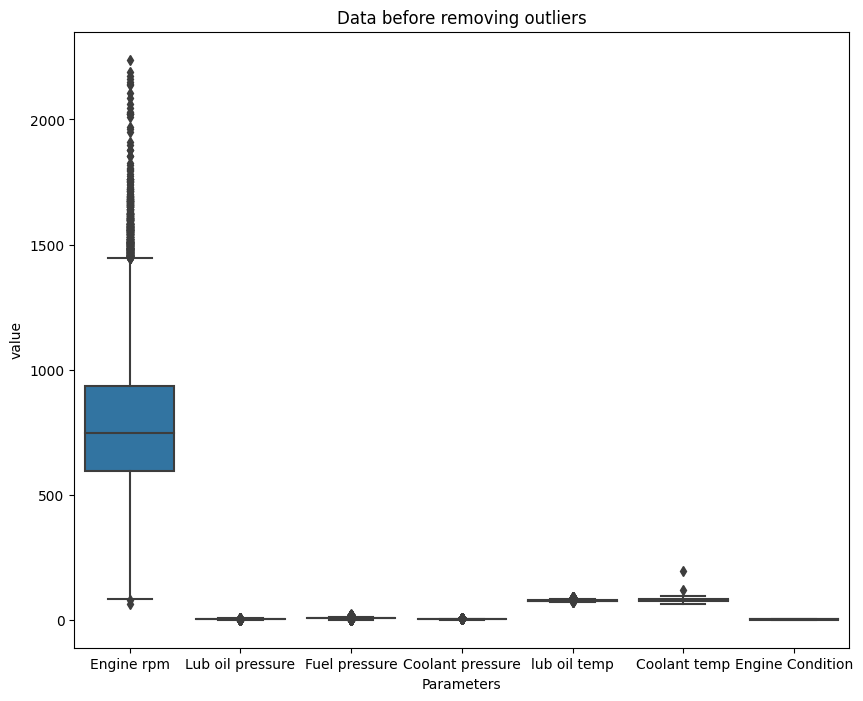

In [34]:
# # Define the columns for which you want to create boxplots
# column_list = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp', 'Engine Condition']

# def plot_boxplot(data):
#   for col in data.columns:
#     sns.boxplot(x=col, data=df)
#     sns.boxplot(showmeans=True, whis=0.5)
#     # Use a loop to create and position each boxplot
#     for i, col in enumerate(column_list):
#       sns.boxplot(x=col, y="value", data=data.melt(), showmeans=True, position=i)
#     #sns.boxplot(x="column", y="value", showmeans=True, data=df.melt())
#     plt.title('Data before removing outliers')
#     plt.figure(figsize=(12, 6))
#     plt.xlabel('Parameter')
#     plt.ylabel("value")
#     plt.grid(True)
#     plt.show()

# # Generate boxplots for all columns
#   plot_boxplot(df.copy())


# Create a figure and set the size
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Data before removing outliers')
plt.xlabel('Parameters')
plt.ylabel("value")

# Create a box plot for each column
sns.boxplot(data=engine_df, ax=ax)

# Show the plot
plt.show()


Here are some observations and suggestions based on the common patterns seen in box plots:

1. **Engine RPM:** The RPM data has a few outliers on the high end, indicating moments where the engine is operating at very high speeds.
2. **Lubrication Oil Pressure:** This distribution also shows a skew, with multiple outliers that are significantly higher than the main data cluster.
3. **Fuel Pressure:** Similar to coolant pressure, fuel pressure also has a heavy right skew with several outliers.
4. **Coolant Pressure:** The data is heavily skewed with a number of extreme values on the higher end.
5. **Lubrication Oil Temperature:** There is a long tail at the lower end of the distribution, but the majority of data is concentrated within a narrow range.
6. **Coolant Temperature:** There are a few extreme values well above the rest of the data. These could be instances of overheating.

In [35]:
from sklearn.preprocessing import RobustScaler
# Assuming 'engine_df' is our DataFrame and 'features' are our columns of interest
features = engine_df.columns[:-1]  # Exclude the target variable 'Engine Condition'

# create the scaler object
scaler = RobustScaler()

# fit and transform the data
robust_data = scaler.fit_transform(engine_df[features])

# Convert the array back to a DataFrame
robust_data = pd.DataFrame(robust_data, columns=features)

# Optionally, we can add the target variable back to the scaled DataFrame
robust_data['Engine Condition'] = engine_df['Engine Condition']

# print the original and robust scaled data
print("Original data:\n", engine_df)
print("\nRobust scaled data:\n", robust_data)






# Now 'robust_data' is a DataFrame with the scaled features

Original data:
        Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0             700          2.493592      11.790927          3.178981   
1             876          2.941606      16.193866          2.464504   
2             520          2.961746       6.553147          1.064347   
3             473          3.707835      19.510172          3.727455   
4             619          5.672919      15.738871          2.052251   
...           ...               ...            ...               ...   
19530         902          4.117296       4.981360          4.346564   
19531         694          4.817720      10.866701          6.186689   
19532         684          2.673344       4.927376          1.903572   
19533         696          3.094163       8.291816          1.221729   
19534         504          3.775246       3.962480          2.038647   

       lub oil temp  Coolant temp  Engine Condition  
0         84.144163     81.632187                 1  
1         7

As you can see each feature has been scaled based on the interquartile range, making the dataset less sensitive to outliers. The values are now on a similar scale, which is especially important for machine learning algorithms that are sensitive to the magnitude of input features.

The "Engine Condition" column remains unchanged as it is the target variable and should not be scaled.

# HANDLING CLASS IMBALANCE

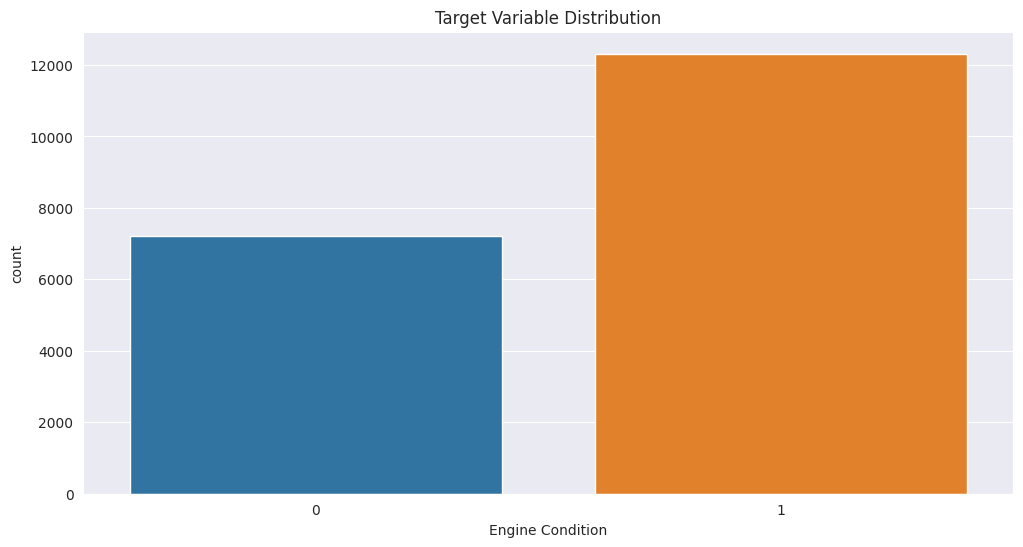

In [36]:
# A box plot showing target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Engine Condition', data = robust_data)
plt.title('Target Variable Distribution')
plt.show()

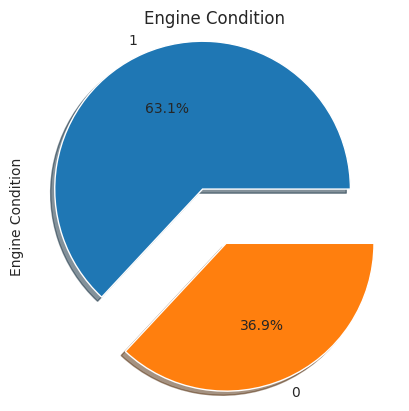

In [37]:
robust_data["Engine Condition"].value_counts().plot.pie(explode=[0.2,0.2],autopct='%1.1f%%',shadow=True)
plt.title('Engine Condition');

In [38]:
X= robust_data.drop(["Engine Condition"], axis=1)
y= robust_data['Engine Condition']
print(X.shape,y.shape)

(19535, 6) (19535,)


In [39]:
undersampler = RandomUnderSampler()
oversampler = RandomOverSampler()
smote = SMOTE()
samplers = [undersampler, oversampler, smote]

model = RandomForestClassifier()
def train_model_on_sampling_techniques(model, samplers, X, y):
    for sampler in samplers:
        X_train_res, y_train_res = sampler.fit_resample(X, y)
        pipeline = make_pipeline(StandardScaler(), model)
        scores = cross_val_score(pipeline, X_train_res, y_train_res, scoring='recall')
        print("The recall score for RFC using {0} is {1} (+/- {2})".format(str(sampler), round(scores.mean(), 3), round(scores.std(), 2)))

train_model_on_sampling_techniques(model, samplers, X, y)

The recall score for RFC using RandomUnderSampler() is 0.595 (+/- 0.02)
The recall score for RFC using RandomOverSampler() is 0.713 (+/- 0.02)
The recall score for RFC using SMOTE() is 0.657 (+/- 0.01)


In [40]:
#oversampling
rus = RandomOverSampler(sampling_strategy=1)
X_train_res,y_train_res = rus.fit_resample(X,y)
x = pd.DataFrame(X_train_res)
y = pd.DataFrame(y_train_res)

data = pd.concat([X,y], axis = 1)
data

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,-0.134897,-0.435055,1.976321,0.810733,3.123507,0.364249,1
1,0.381232,-0.143466,3.533182,0.238407,0.351104,0.454442,0
2,-0.662757,-0.130358,0.124263,-0.883178,0.398566,0.144026,1
3,-0.800587,0.355233,4.705814,1.250084,-1.145689,-0.728608,1
4,-0.372434,1.634204,3.372298,-0.091825,0.673419,0.959376,0
...,...,...,...,...,...,...,...
24629,NaN,NaN,NaN,NaN,NaN,NaN,0
24630,NaN,NaN,NaN,NaN,NaN,NaN,0
24631,NaN,NaN,NaN,NaN,NaN,NaN,0
24632,NaN,NaN,NaN,NaN,NaN,NaN,0


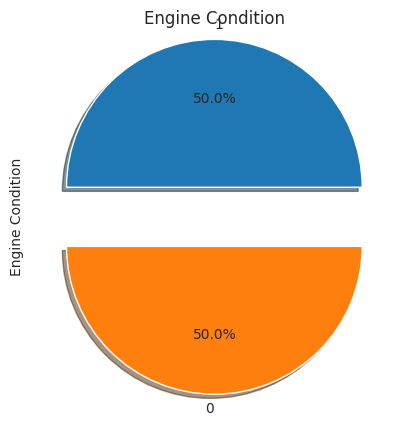

In [41]:
y_train_res.value_counts().plot.pie(explode=[0.2,0.2],autopct='%1.1f%%',shadow=True)
plt.title('Engine Condition');

In [42]:
print(X_train_res.shape,y_train_res.shape)

(24634, 6) (24634,)


# DATA SPLIT

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

#Show the number of rows and columns in each set
print("Training X shape:",X_train.shape)
print("Training y shape:",y_train.shape)
print('\n')
print("Testing X shape:",X_test.shape)
print("Testing y shape:",y_test.shape)

Training X shape: (19707, 6)
Training y shape: (19707,)


Testing X shape: (4927, 6)
Testing y shape: (4927,)


# APPLYING MACHINE LEARNING MODELS

Random Forest Classifier

ACCURACY OF THE MODEL:  76.53744672214329 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.74      0.82      0.78      2448
           1       0.80      0.71      0.75      2479

    accuracy                           0.77      4927
   macro avg       0.77      0.77      0.76      4927
weighted avg       0.77      0.77      0.76      4927



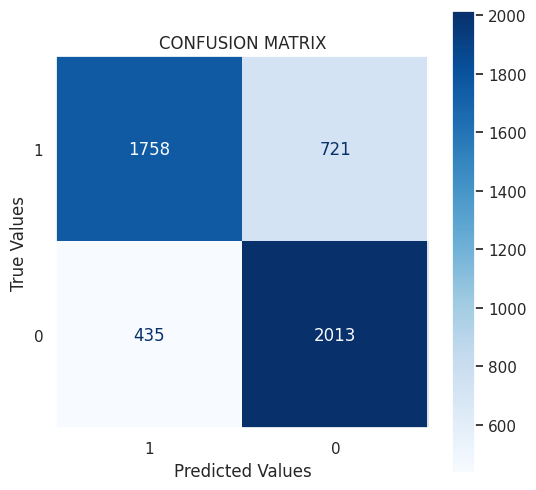

In [44]:
# creating a RF classifier
rfc = RandomForestClassifier()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train,y_train)

# performing predictions on the test dataset
rfc_pred = rfc.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, rfc_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, rfc_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,rfc_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 87.74473551690409 % 



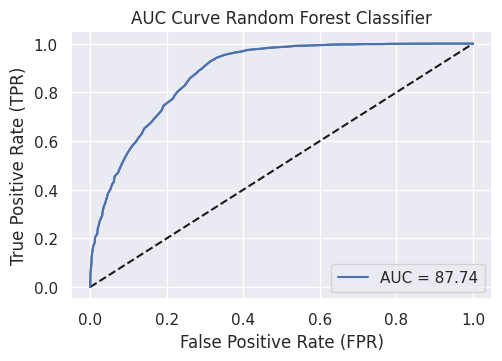

In [45]:
plt.figure(figsize=(25,16))
Y_predict1_proba = rfc.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)*100
print('ROC_AUC value :',roc_auc,"%",'\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve Random Forest Classifier')
plt.grid(True)
plt.show()


Gaussian Naive Bayes (GNB)

ACCURACY OF THE MODEL:  62.71564846762736 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.65      0.55      0.59      2448
           1       0.61      0.70      0.66      2479

    accuracy                           0.63      4927
   macro avg       0.63      0.63      0.62      4927
weighted avg       0.63      0.63      0.62      4927



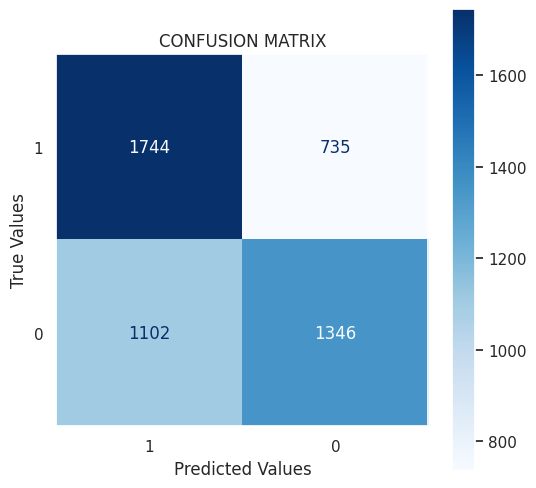

In [46]:
from sklearn.naive_bayes import GaussianNB

# Define and train the GNB model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict RUL on test set
gnb_pred = gnb.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, gnb_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, gnb_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,gnb_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 67.89711682709927 % 



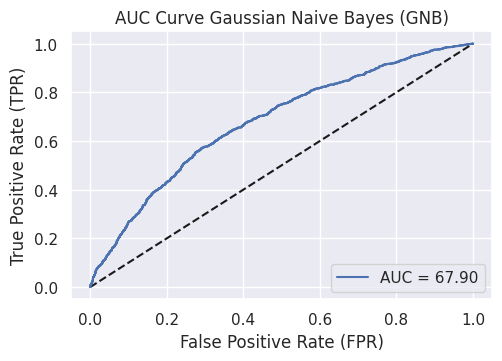

In [47]:
plt.figure(figsize=(25,16))
Y_predict1_proba = gnb.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)*100
print('ROC_AUC value :',roc_auc,"%",'\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve Gaussian Naive Bayes (GNB)')
plt.grid(True)
plt.show()

Logistic Regression

ACCURACY OF THE MODEL:  64.62350314593058 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.66      0.61      0.63      2448
           1       0.64      0.68      0.66      2479

    accuracy                           0.65      4927
   macro avg       0.65      0.65      0.65      4927
weighted avg       0.65      0.65      0.65      4927



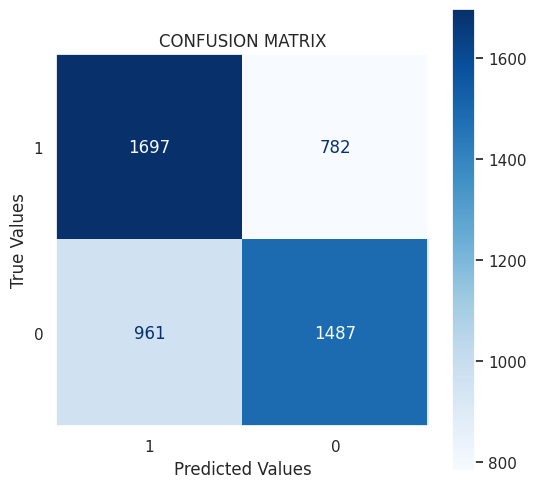

In [48]:
# Initialise Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(X_train, y_train)

# Use the trained model for prediction on the testing data
lg_pred = lg.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, lg_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, lg_pred))


sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,lg_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 0.6931622689414612 



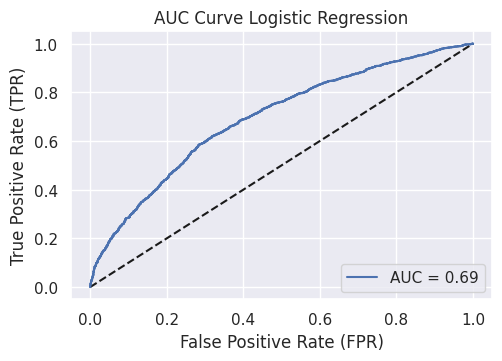

In [49]:
plt.figure(figsize=(25,16))
Y_predict1_proba = lg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)
print('ROC_AUC value :',roc_auc,'\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve Logistic Regression')
plt.grid(True)
plt.show()

Gradient Boosting Machine

ACCURACY OF THE MODEL:  65.94276435965091 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.65      0.69      0.67      2448
           1       0.67      0.63      0.65      2479

    accuracy                           0.66      4927
   macro avg       0.66      0.66      0.66      4927
weighted avg       0.66      0.66      0.66      4927



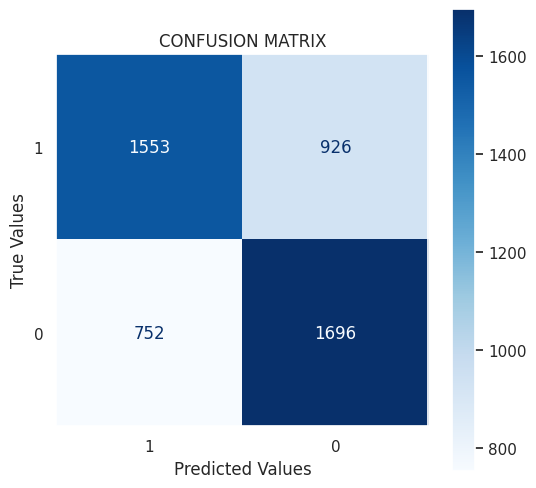

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_booster = GradientBoostingClassifier()

gradient_booster.fit(X_train,y_train)

# Predict on test set
gbc_pred = gradient_booster.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, gbc_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, gbc_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,gbc_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 71.6630068391482 %



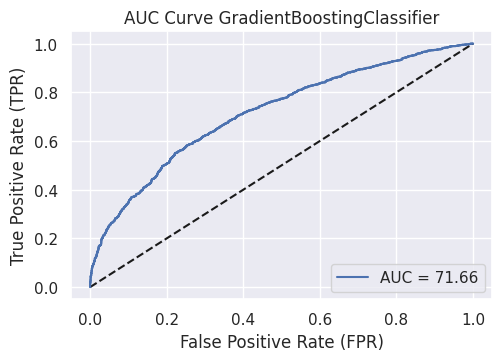

In [51]:
plt.figure(figsize=(25,16))
Y_predict1_proba = gradient_booster.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)*100
print('ROC_AUC value :',roc_auc,'%''\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve GradientBoostingClassifier')
plt.grid(True)
plt.show()

Support Vector Machine (SVM)

ACCURACY OF THE MODEL:  65.69920844327177 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.64      0.69      0.67      2448
           1       0.67      0.62      0.65      2479

    accuracy                           0.66      4927
   macro avg       0.66      0.66      0.66      4927
weighted avg       0.66      0.66      0.66      4927



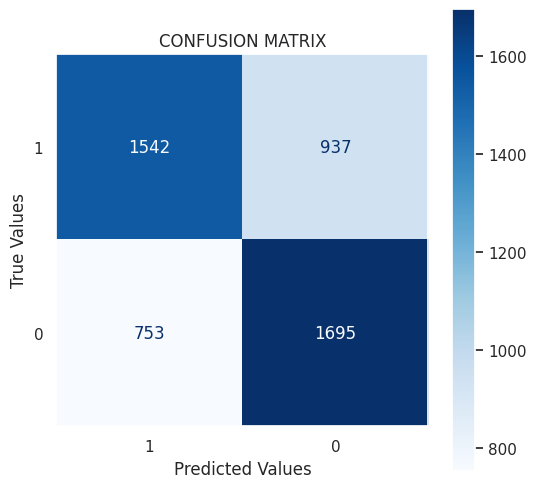

In [52]:
#Import svm model
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC(probability=True)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = clf.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, svm_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, svm_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 70.7633418097641 %



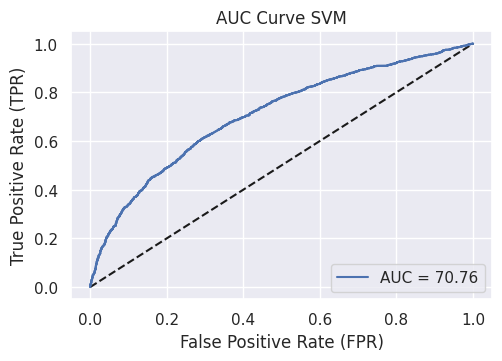

In [53]:
plt.figure(figsize=(25,16))
Y_predict1_proba = clf.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)*100
print('ROC_AUC value :',roc_auc,'%''\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve SVM')
plt.grid(True)
plt.show()

# MODEL HYPERPARAMETER TUNING

Random Forest Classifier

In [54]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, StratifiedKFold

In [55]:
rfc = RandomForestClassifier()
params = [{'n_estimators':[100,150,200],'max_depth':range(2,6),'min_samples_leaf':range(2,5), 'min_samples_split': [8,10]}]
grd = GridSearchCV(estimator=rfc,param_grid=params)
grd_model = grd.fit(X_train,y_train)
best_model = grd_model.best_estimator_
best_model


RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=200)

In [56]:
grd_model.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [57]:
rfc = RandomForestClassifier(n_estimators=grd_model.best_params_['n_estimators'],
                             max_depth=grd_model.best_params_['max_depth'],
                             min_samples_leaf=grd_model.best_params_['min_samples_leaf'],
                             min_samples_split=grd_model.best_params_['min_samples_split'])

rfc.fit(X_train,y_train)

# performing predictions on the test dataset
rf_pred = rfc.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, rf_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")

ACCURACY OF THE MODEL:  65.33387456870307 %


Logistic Regression

In [58]:
strat_kfold = StratifiedKFold(shuffle=True)
model = LogisticRegression()
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C': [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]}

grid_search = GridSearchCV(model, param_grid, scoring='recall', cv=strat_kfold)
grid_search = grid_search.fit(X_train, y_train)
print(f'Best recall score is: {grid_search.best_score_} for set of parameters {grid_search.best_params_}')

Best recall score is: 0.670359354140059 for set of parameters {'C': 1, 'solver': 'newton-cg'}


In [59]:
grid_search.best_params_

{'C': 1, 'solver': 'newton-cg'}

In [60]:
model = LogisticRegression(solver=grid_search.best_params_['solver'], C=grid_search.best_params_['C'], penalty='l2')

model.fit(X_train,y_train)

# performing predictions on the test dataset
y_pred = model.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")

ACCURACY OF THE MODEL:  64.62350314593058 %


Gaussian Naive Bayes (GNB)

In [61]:
# Define the model and parameter grid
gnb = GaussianNB()
param_grid = {
    "var_smoothing": np.logspace(-9, 0, num=10),
    "priors": [None, np.array([0.7, 0.3])]
}

# Instantiate and fit GridSearchCV
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Access best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model

GaussianNB(var_smoothing=0.01)

In [62]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 0.01}

In [63]:
gnb = GaussianNB(priors = grid_search.best_params_['priors'], var_smoothing = grid_search.best_params_['var_smoothing'])

gnb.fit(X_train,y_train)

# performing predictions on the test dataset
y_pred = gnb.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")

ACCURACY OF THE MODEL:  62.796833773087066 %


Gradient Boosting Classifier

In [64]:
# Define the model and parameter grid
model = GradientBoostingClassifier()
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.1, 0.05, 0.01],
    "max_depth": [3, 5, 7],
    "min_samples_leaf": [5, 10, 20],
    "min_samples_split": [5, 10, 15],
    "loss": ["deviance", "log_loss"],
}

# Instantiate and fit GridSearchCV
grid_search = HalvingGridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Access best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=20,
                           min_samples_split=5, n_estimators=50)

In [65]:
grid_search.best_params_

{'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 5,
 'n_estimators': 50}

In [66]:
model = GradientBoostingClassifier(n_estimators = grid_search.best_params_['n_estimators'],
                         learning_rate = grid_search.best_params_['learning_rate'],
                         max_depth = grid_search.best_params_['max_depth'],
                         min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                         min_samples_split = grid_search.best_params_['min_samples_split'],
                         loss = grid_search.best_params_['loss'])

model.fit(X_train,y_train)

# performing predictions on the test dataset
abc_pred = model.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, abc_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")

ACCURACY OF THE MODEL:  65.19180028414857 %


Support Vector Machine (SVM)

In [67]:
# Define the model and parameter grid
model = SVC()
param_grid = {
    "C": np.logspace(-3, 3, num=10),
    "kernel": ["linear", "rbf"],
    "degree": [2, 3],
    "gamma": np.logspace(-7, -3, num=5),
    "tol": [0.001, 0.01],
}

# Instantiate and fit GridSearchCV
grid_search = HalvingGridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Access best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model


SVC(C=2.154434690031882, degree=2, gamma=0.0001, kernel='linear', tol=0.01)

In [68]:
grid_search.best_params_

{'C': 2.154434690031882,
 'degree': 2,
 'gamma': 0.0001,
 'kernel': 'linear',
 'tol': 0.01}

In [69]:
svm = SVC(C = grid_search.best_params_['C'],
            kernel = grid_search.best_params_['kernel'],
            degree = grid_search.best_params_['degree'],
            gamma = grid_search.best_params_['gamma'],
            tol= grid_search.best_params_['tol'])

svm.fit(X_train,y_train)

# performing predictions on the test dataset
svm_pred = svm.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, svm_pred)*100
print("ACCURACY OF THE MODEL: ",Accuracy, "%")

ACCURACY OF THE MODEL:  64.2581692713619 %


# ENSEMBLING MODELS USING STACKING

In [74]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

comparing the distribution of accuracy scores for each algorithm.

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['rfc'] = RandomForestClassifier()
  models['gbm'] = GradientBoostingClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  return models


# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.639 (0.011)
>rfc 0.754 (0.010)
>gbm 0.657 (0.010)


We can see above that in this case, Random Forest performs the best with about 75.2 percent mean accuracy.

Now, combining these five models into a single ensemble model using stacking. We want to see if the stacking ensemble will perform better than any single base model.

>lr 0.639 (0.011)
>rfc 0.752 (0.009)
>gbm 0.657 (0.010)
>svm 0.650 (0.010)
>bayes 0.622 (0.010)
>stacking 0.768 (0.010)


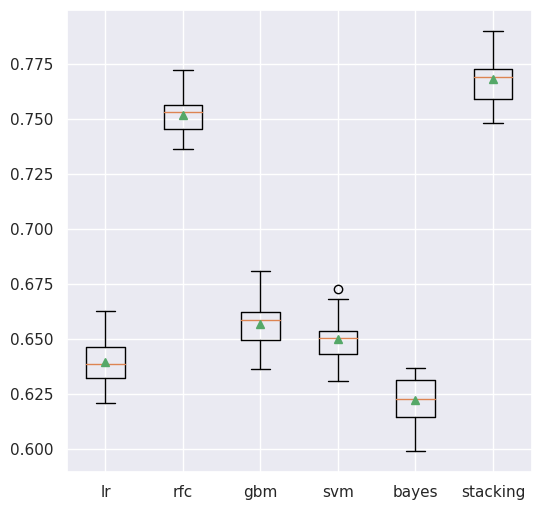

In [72]:
# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('rfc', RandomForestClassifier()))
  level0.append(('gbm', GradientBoostingClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))

  # define meta learner model
  level1 = LogisticRegression()

  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model


# get a list of models to evaluate
def get_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['rfc'] = RandomForestClassifier()
  models['gbm'] = GradientBoostingClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['stacking'] = get_stacking()
  return models

# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case above, we can see that the stacking ensemble appears to perform better than any single model on average, achieving an accuracy of about 76.8 percent.

Making a prediction with a stacking ensemble

ACCURACY OF THE MODEL:  78.46559772681144 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      2448
           1       0.78      0.80      0.79      2479

    accuracy                           0.78      4927
   macro avg       0.78      0.78      0.78      4927
weighted avg       0.78      0.78      0.78      4927



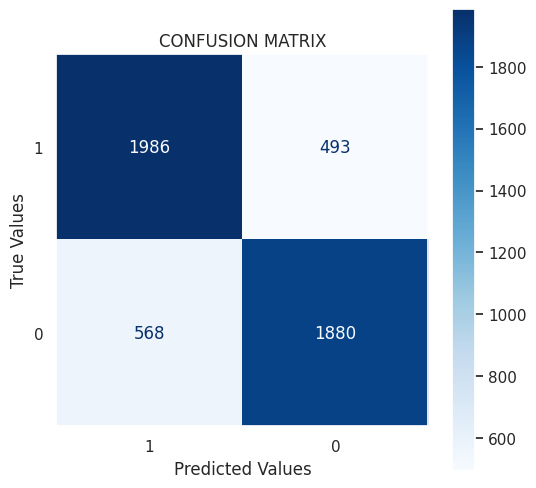

In [77]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('rfc', RandomForestClassifier()))
level0.append(('gbm', GradientBoostingClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
stacking_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
stacking_model.fit(X_train, y_train)

# performing predictions on the test test set using the stacking classifier
stacking_pred = stacking_model.predict(X_test)

# using metrics module for accuracy calculation
Accuracy = metrics.accuracy_score(y_test, stacking_pred)*100
print("ACCURACY OF THE STACKING MODEL: ",Accuracy, "%")
print('\nClassification Report : ','\n',classification_report(y_test, stacking_pred))

sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,stacking_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()


In [78]:
# make a prediction for one example
Engine_Con = stacking_model.predict([[619,	5.672919,	15.738871,	2.052251,	78.396989,	87.000225	]])
print('Engine Condition: %d' % (Engine_Con))

Engine Condition: 0


In [ ]:
# ## Create a Pickle file using serialization
# import pickle
# #pickle_out = open("model.pkl", "wb")
# #pickle.dump(model, pickle_out)
# #pickle_out.close()

# with open('trained_model-1.0.2.pkl', 'wb') as f:
#     pickle.dump(model,f)

In [ ]:
# print('The scikit-learn version is {}.'.format(sklearn.__version__))